In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
import string

data = pd.read_pickle('final cleaned data input without any embedding.pkl')

In [3]:
data

,label,tweet
0,0,"[upset, cant, update, facebook, texting, it, m..."
1,0,"[i, dive, many, time, ball, manage, save, 0, t..."
2,0,"[whole, body, feel, itchy, like, fire]"
3,0,"[no, it, not, behave, all, im, mad, here, i, c..."
4,0,"[not, whole, crew]"
...,...,...
1599994,1,"[just, wake, up, have, no, school, best, feeli..."
1599995,1,"[thewdbcom, very, cool, hear, old, walt, inter..."
1599996,1,"[be, ready, mojo, makeover, ask, detail]"
1599997,1,"[happy, th, birthday, boo, alll, time, tupac, ..."


# GloVe50 embedding

In [8]:
from nltk.tokenize import word_tokenize
import gensim.downloader as api

#load pretrained glove50 model
wv = api.load('glove-wiki-gigaword-50')

def get_embedding(text):
    tokens = word_tokenize(text)
    embeddings = [wv[word] for word in tokens if word in wv]
    if not embeddings:
        return np.zeros(wv.vector_size)
    return np.mean(embeddings, axis=0)

In [10]:
# convert into numerical vals with glove50
data['embedding'] = data['tweet'].apply(lambda x: get_embedding(str(x)))

In [11]:
data.head(6)

,label,tweet,embedding
0,0,"[upset, cant, update, facebook, texting, it, m...","[-0.05897091, 0.7467163, 0.12007665, -0.089397..."
1,0,"[i, dive, many, time, ball, manage, save, 0, t...","[-0.061586715, 0.7604908, 0.1392199, -0.104760..."
2,0,"[whole, body, feel, itchy, like, fire]","[-0.10851683, 0.7752616, 0.14976382, -0.104643..."
3,0,"[no, it, not, behave, all, im, mad, here, i, c...","[-0.052161153, 0.7419824, 0.12117264, -0.12810..."
4,0,"[not, whole, crew]","[-0.19041927, 0.8224487, 0.19883856, -0.129845..."
5,0,"[need, hug]","[-0.26140139, 0.8633441, 0.24136999, -0.151687..."


In [12]:
X = data['embedding']
X = np.stack(data['embedding'].values)

In [16]:
y = data['label'].to_numpy()

# Logistic Regression

Accuracy: 0.5506

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.41      0.48     79812
           1       0.54      0.69      0.61     80188

    accuracy                           0.55    160000
   macro avg       0.55      0.55      0.54    160000
weighted avg       0.55      0.55      0.54    160000



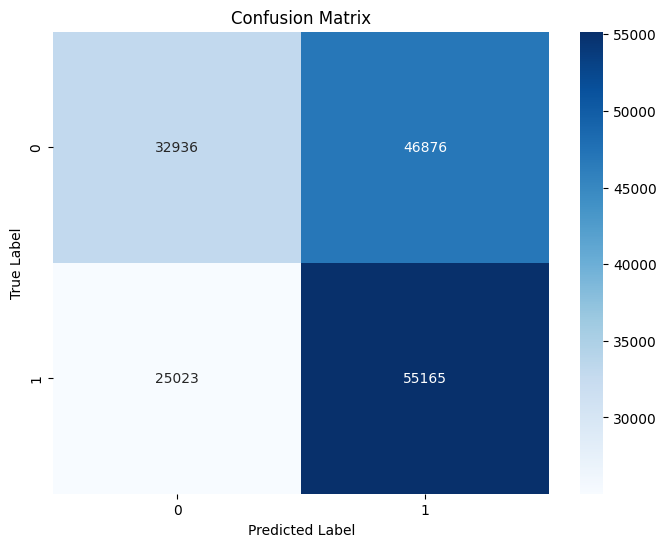

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(solver='liblinear', penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred)) # No need for target_names if you're okay with numerical labels

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(data['label'].unique()), # Use unique numerical labels for x-axis
            yticklabels=sorted(data['label'].unique())) # Use unique numerical labels for y-axis
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()